# 주택 가격 예측하기 (회귀)

## 조건 : 테스트세트 점수가 0.7 이상이어야 함 (아래 3가지 알고리즘 중 2가지 선택해서 사용)

### 힌트 : 과소적합이 나올 경우, 특성 늘린 뒤, MinMaxScaler 사용하기

### 회귀 알고리즘 종류
- LinearRegression
- Ridge
- KNeighborsRegressor

In [1]:
import pandas as pd
import numpy as np

## 'housing_price' csv파일을 불러와 'housing' 변수에 저장하기

In [57]:
housing = pd.read_csv('../data/housing_price.csv',encoding ='euc-kr')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


## housing 결측치 확인하기

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


## housing에 결측치가 있을 경우 null이 있는 행 모두 제거하기 + 잘 제거되었는지 확인

In [59]:
housing.dropna(inplace = True)
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## 문제데이터(X), 정답데이터(y) 나누기
- 정답 데이터(y)는 'median_house_value'
- 문제 데이터(X)는 'median_house_value'을 뺀 나머지

In [60]:
y = housing.median_house_value
X = housing.drop(['median_house_value'],axis=1, inplace = False)

## 문제데이터(X), 정답데이터(y) 잘 나누어졌는지 확인

In [61]:
X.shape, y.shape

((20433, 8), (20433,))

## EDA
- seaborn의 pairplot 사용
- x축은 housing_median_age 부터 median_income까지 나타내기(총 5개 칼럼)
- y축은 median_house_value 
- kind = 'reg' 

In [44]:
import seaborn as sns

In [45]:
text = ['total_rooms','total_bedrooms','population','households','median_income']
print(text[0:5])

['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


/Users/gimsuhwan/Library/Python/3.7/lib/python/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


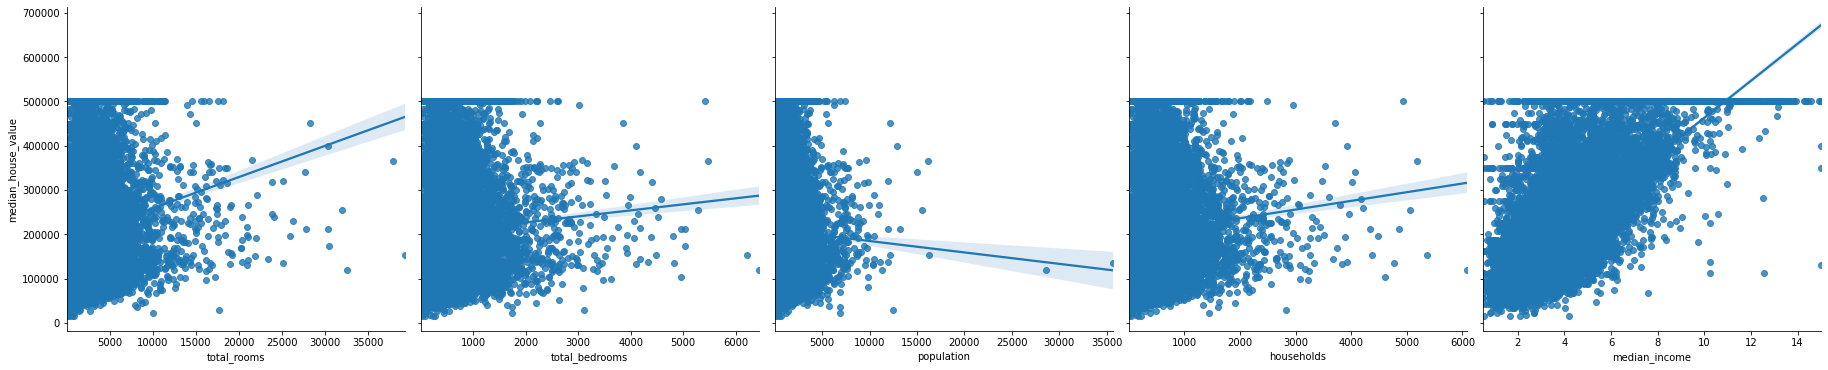

In [46]:
sns.pairplot(housing, x_vars=text[0:5],y_vars="median_house_value",kind='reg',size=5)

## 학습용/테스트용 데이터 나누기
- test_size = 0.3
- random_state=3

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

## 학습용/테스트용 데이터 잘 나누어졌는지 확인

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14303, 8) (6130, 8) (14303,) (6130,)


## 머신러닝 선택+객체만들기+학습+평가(R squared(0.7이상 나와야 함), RMSE 둘 다 계산)

### 힌트 : 과소적합이 나올 경우, 특성 늘린 뒤, MinMaxScaler 사용하기

### 회귀 알고리즘 종류 (3가지 중 2가지 선택)
- LinearRegression
- Ridge
- KNeighborsRegressor

## LinearRegression 알고리즘 사용할 경우

In [65]:
col = X.columns
for i in range(col.size):
    for j in range(i,col.size):
        X[col[i]+'x'+col[j]] = X[col[i]]*X[col[j]]

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)


In [76]:
print("훈련 세트 점수 : {:.3f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(lr.score(X_test,y_test)))
print("RMSE : "+str(np.sqrt(mean_squared_error(y_test,y_pred))))


훈련 세트 점수 : 0.695
테스트 세트 점수 : 0.706
RMSE : 63389.039854802315


## Ridge 알고리즘 사용할 경우

In [77]:
from sklearn.linear_model import Ridge

In [105]:
ridge = Ridge(alpha=0.002)
ridge.fit(X_train,y_train)

Ridge(alpha=0.002)

In [109]:
print("훈련 세트 점수 : {}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {}".format(ridge.score(X_test,y_test)))
y_pred = ridge.predict(X_test)
print("RMSE : "+str(np.sqrt(mean_squared_error(y_test,y_pred))))

훈련 세트 점수 : 0.6901894487313462
테스트 세트 점수 : 0.7012471402679584
RMSE : 63862.38309588484


## KNeighborsRegressor 알고리즘 사용할 경우

In [129]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,y_train)

print("훈련점수 : {:.3f}".format(knn.score(X_train,y_train)))
print("평가점수 : {:.3f}".format(knn.score(X_test,y_test)))

y_pred = knn.predict(X_test)
print("RMSE : "+str(np.sqrt(mean_squared_error(y_test,y_pred))))

훈련점수 : 0.763
평가점수 : 0.701
RMSE : 63892.996620119615
